## Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [64]:
# Load required libraries

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler 
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error 

Boston dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.
There are 14 attributes in each case of the dataset. 
    

In [6]:
# Read the boston datasets

from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [7]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [8]:
boston_data = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_data['Price'] = boston.target

In [9]:
#View first rows of boston_data

boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Preprocessing

In [10]:
## Check if there are null values in any of the columns

boston_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
boston_data.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### There are no missing values in this dataset. So we can proceed with the data now . All counts have 506 data points. Few columns have high dispersion when we consider the range of values

## Exploratory Data Analysis
Lets look at the data and see if there is any relationship between dependant and independant variables

### Lets see how the data is distributed in general

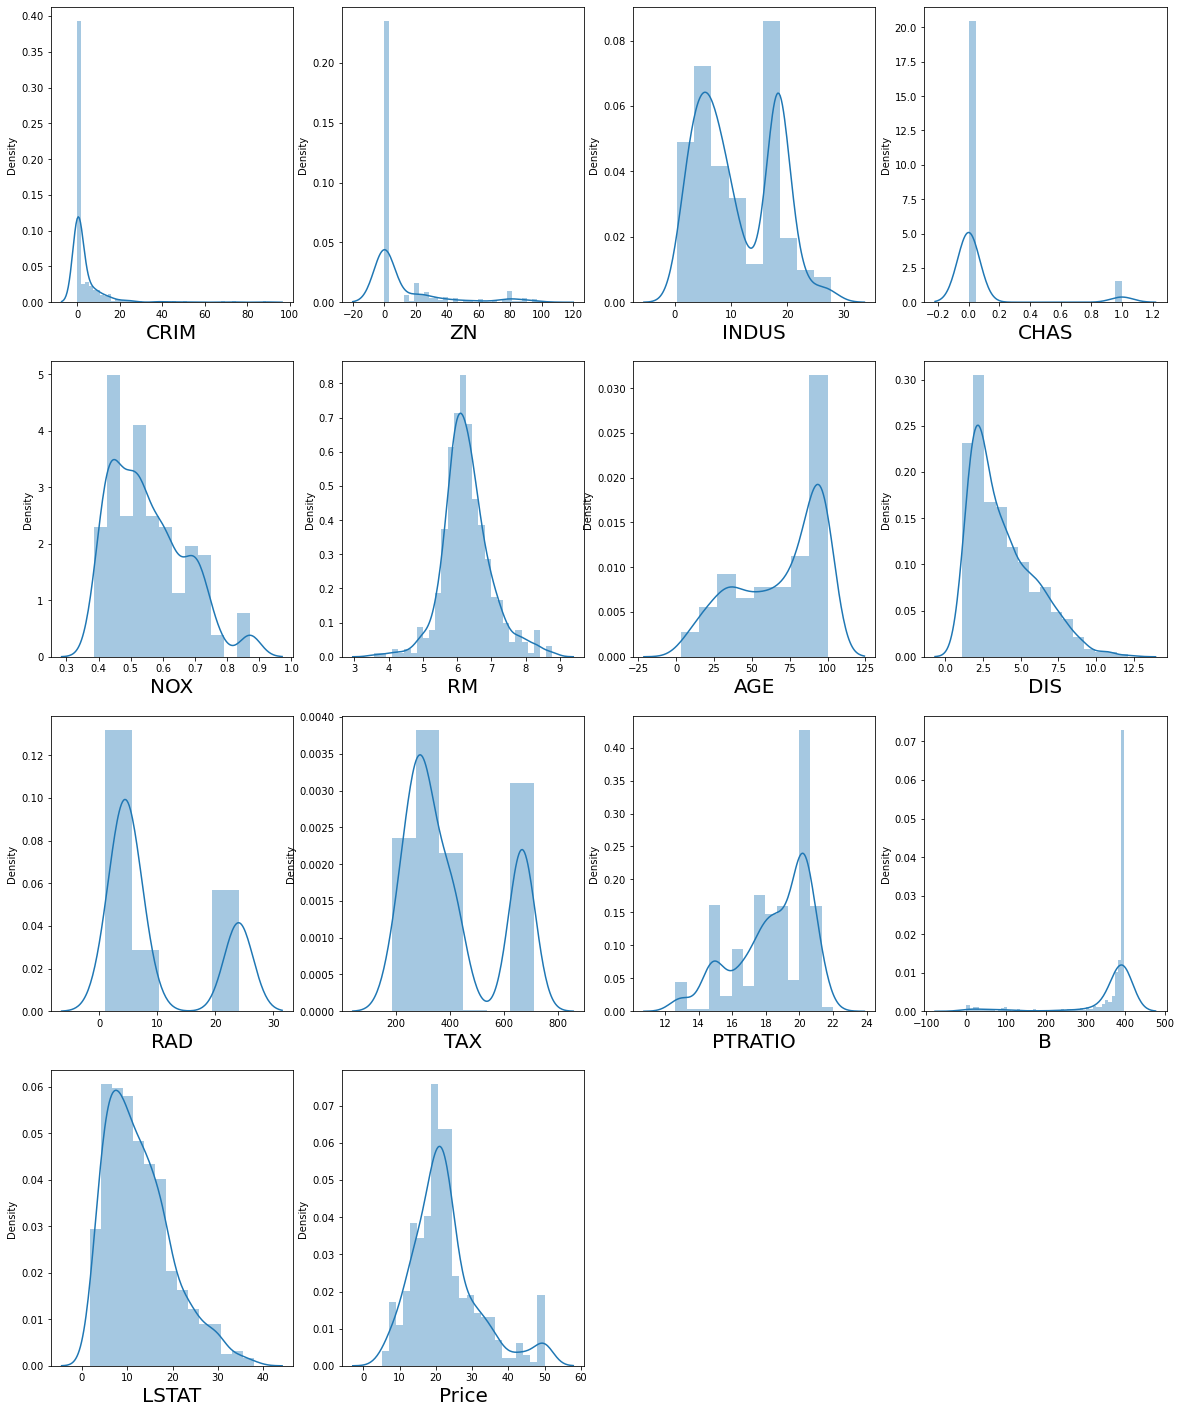

In [16]:
plt.figure(figsize=(20,25))
plotcount = 1
for column in boston_data:
    if plotcount <=14:
        ax = plt.subplot(4,4,plotcount)
        sns.distplot(boston_data[column])
        plt.xlabel(column,fontsize=20)
    plotcount+=1

#### The target variable price is normally distributed with some outliers . Rest of the feature columns , most of them looks skewed . We will require some data standardization steps.

Lets look at the relationship between the independant and dependant variables; For that lets do scatter plots for each of the features to the target variable, "Price"

In [97]:
Y = boston_data['Price']
X = boston_data.drop(columns=['Price'])


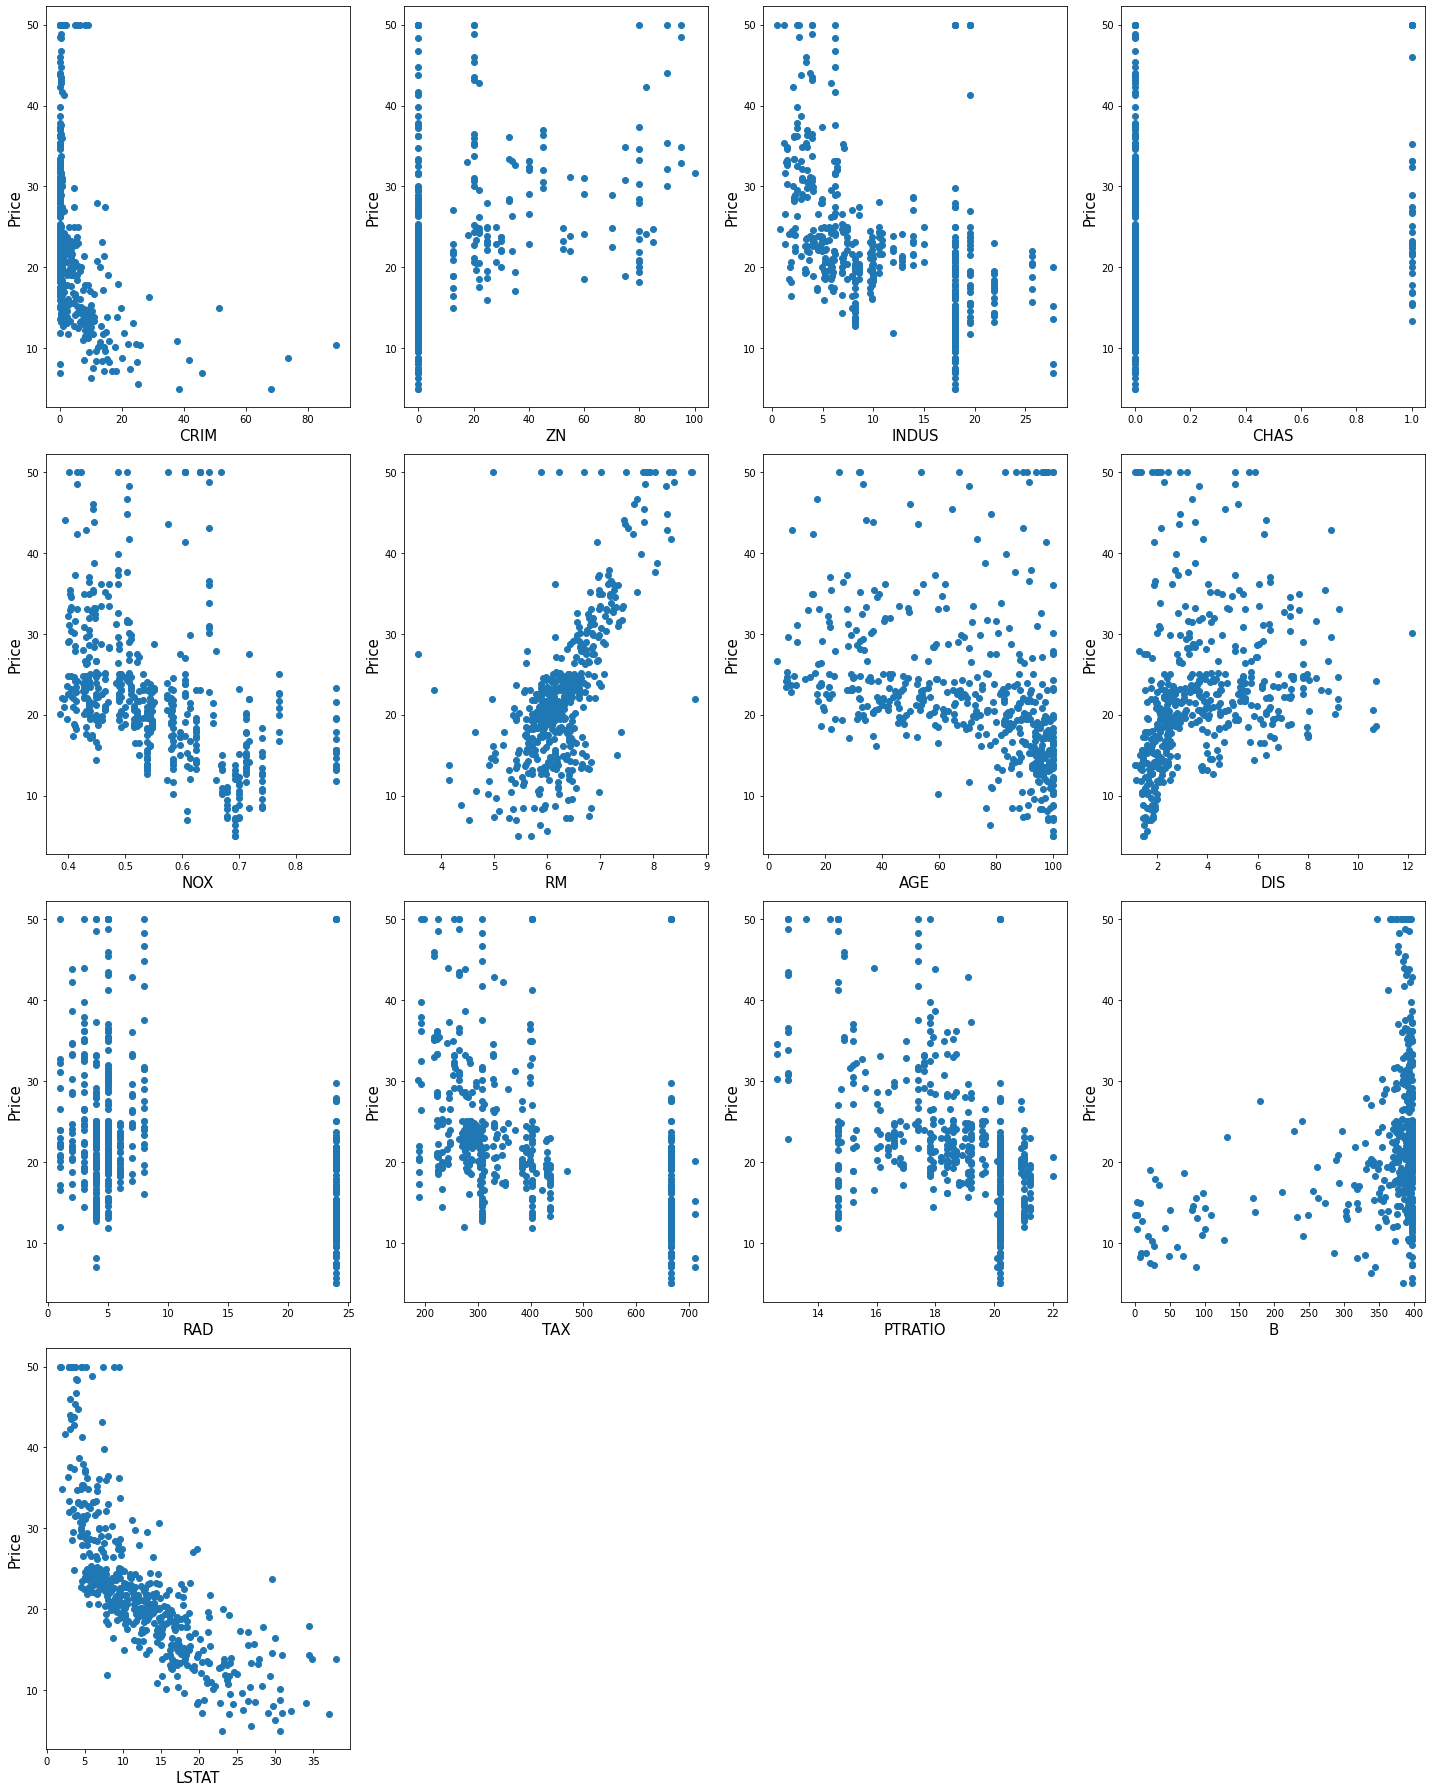

In [41]:
plt.figure(figsize=(20,25))
plotcount = 1

for column in X:
    if plotcount <= 15:
        ax = plt.subplot(4,4,plotcount)
        plt.scatter(X[column],Y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Price',fontsize=15)
    plotcount+=1
plt.tight_layout()

From this RM shows strong positive correlation and LSTAT shows strong negative correlation. 

Lets plot a correlation matrix as well

[Text(0.5, 0, 'CRIM'),
 Text(1.5, 0, 'ZN'),
 Text(2.5, 0, 'INDUS'),
 Text(3.5, 0, 'CHAS'),
 Text(4.5, 0, 'NOX'),
 Text(5.5, 0, 'RM'),
 Text(6.5, 0, 'AGE'),
 Text(7.5, 0, 'DIS'),
 Text(8.5, 0, 'RAD'),
 Text(9.5, 0, 'TAX'),
 Text(10.5, 0, 'PTRATIO'),
 Text(11.5, 0, 'B'),
 Text(12.5, 0, 'LSTAT'),
 Text(13.5, 0, 'Price')]

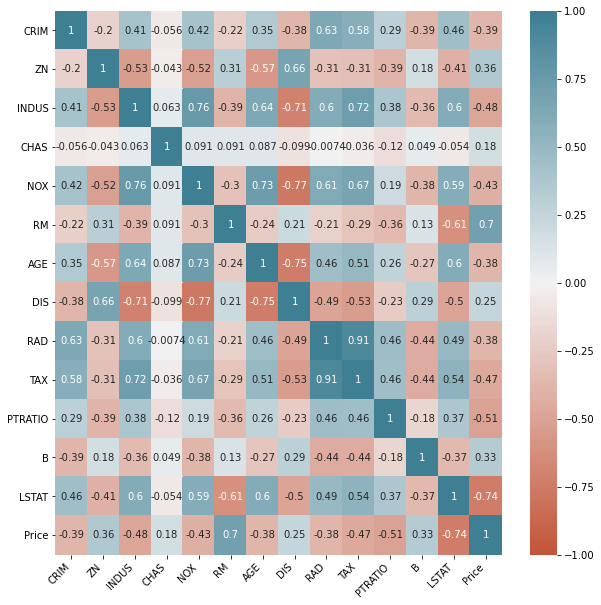

In [49]:
corr_matrix = boston_data.corr()
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr_matrix,annot=True,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20, 220, n=200))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

PTRATIO also has some level of negative correlation with price.

Lets standardize the dataset!

In [123]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

After Scaling ....

Lets check for multicollinearity..

In [104]:
vif_data = pd.DataFrame()
variables = X_scaled
vif_data["Features"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif_data

,Features,VIF
0,CRIM,1.792192
1,ZN,2.298758
2,INDUS,3.991596
3,CHAS,1.073995
4,NOX,4.393720
5,RM,1.933744
6,AGE,3.100826
7,DIS,3.955945
8,RAD,7.484496
9,TAX,9.008554


RAD and TAX are highly correlated ...!

Now lets build the first model using Linear Regression with just the unscaled data

In [137]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)
regression = LinearRegression()
regression.fit(x_train,y_train)
reg_score_train = regression.score(x_train,y_train)
reg_score = regression.score(x_test,y_test)
mse = mean_squared_error(y_test, y_pred)

In [139]:
print("Regression score for train set with plain regression on unscaled data ",reg_score_train)
print("Regression score for test set with plain regression on unscaled data ",reg_score)
print("Mean Square Error : ", mse)

Regression score for train set with plain regression on unscaled data  0.730647531347494
Regression score for test set with plain regression on unscaled data  0.7519030329262337
Mean Square Error :  23.90893754426727


Let's use the scaled data and check the accuracy...

In [126]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size = 0.25,random_state=355)
regression_scaled=LinearRegression()
regression_scaled.fit(x_train,y_train)

y_pred = regression_scaled.predict(x_test)
reg_score_scaled = regression_scaled.score(x_test,y_test)
mse_reg_scaled = mean_squared_error(y_test, y_pred)


print("Regression score for test set with plain regression on scaled data ",reg_score_scaled)
print("Mean Square Error : ", mse_reg_scaled)

Regression score for test set with plain regression on scaled data  0.7519030329262334
Mean Square Error :  22.178426943709905


No change in error and accuracy due to scaling !

### So lets move ahead with unscaled data and also, remove TAX fron the features as it is highly correlated with RAD

In [128]:
X_final = X.drop(columns=['TAX'])

In [131]:
x_train,x_test,y_train,y_test = train_test_split(X_final,Y,test_size = 0.25,random_state=355)
regression_mulcolrem = LinearRegression()
regression_mulcolrem.fit(x_train,y_train)

reg_score_mulcolrem = regression_mulcolrem.score(x_test,y_test)

y_pred = regression_mulcolrem.predict(x_test)
mse_mulcolrem = mean_squared_error(y_test, y_pred)

print("Regression score for test set with plain regression after removing multicollinearity ",reg_score_mulcolrem)
print("Mean Square Error : ", mse_mulcolrem)

Regression score for test set with plain regression on scaled data  0.7431889797578297
Mean Square Error :  22.957412651832584


In [134]:
X_final = X.drop(columns=['RAD'])
x_train,x_test,y_train,y_test = train_test_split(X_final,Y,test_size = 0.25,random_state=355)
regression_mulcolrem = LinearRegression()
regression_mulcolrem.fit(x_train,y_train)
reg_score_mulcolrem = regression_mulcolrem.score(x_test,y_test)

y_pred = regression_mulcolrem.predict(x_test)
mse_mulcolrem = mean_squared_error(y_test, y_pred)
print("Regression score for test set with plain regression after removing multicollinearity ",reg_score_mulcolrem)
print("Mean Square Error : ", mse_mulcolrem)

Regression score for test set with plain regression after removing multicollinearity  0.7330599172441088
Mean Square Error :  23.86289197154565


Lets move ahead with all the features and try to do some regularization 

### Lasso

In [136]:
from sklearn.linear_model import LassoCV

In [142]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)
las_cv=LassoCV(alphas=None,cv=10,max_iter=10000,normalize=True)
las_cv.fit(x_train,y_train)
lasso_reg_score_train=las_cv.score(x_train,y_train)
lasso_reg_score_test=las_cv.score(x_test,y_test)
y_pred = las_cv.predict(x_test)
mse_lassocv = mean_squared_error(y_test, y_pred)
 
print("Lasso Regression score for train set with regression on unscaled data ",lasso_reg_score_train)
print("Lasso Regression score for test set with regression on unscaled data ",lasso_reg_score_test)
print("Lasso Mean Square Error : ", mse_lassocv)                                 

Lasso Regression score for train set with plain regression on unscaled data  0.730622088831532
Lasso Regression score for test set with plain regression on unscaled data  0.7517324187931373
Lasso Mean Square Error :  22.193678855617843


### Ridge

In [143]:
from sklearn.linear_model import RidgeCV

In [146]:
alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize=True,)
ridgecv.fit(x_train,y_train)
ridge_reg_score_train=ridgecv.score(x_train,y_train)
ridge_reg_score_test=ridgecv.score(x_test,y_test)
y_pred = ridgecv.predict(x_test)
mse_ridgecv = mean_squared_error(y_test, y_pred)
 
print("Ridge Regression score for train set with regression on unscaled data ",ridge_reg_score_train)
print("Ridge Regression score for test set with regression on unscaled data ",ridge_reg_score_test)
print("Ridge Mean Square Error : ", mse_ridgecv)                                 

Ridge Regression score for train set with regression on unscaled data  0.7235804188626885
Ridge Regression score for test set with regression on unscaled data  0.7338053468966581
Ridge Mean Square Error :  23.7962548929641


### ElasticNet

In [147]:
from sklearn.linear_model import ElasticNetCV

In [148]:
enetcv=ElasticNetCV(cv=10,normalize=True,)
enetcv.fit(x_train,y_train)
enet_reg_score_train=enetcv.score(x_train,y_train)
enet_reg_score_test=enetcv.score(x_test,y_test)
y_pred = enetcv.predict(x_test)
mse_enetcv = mean_squared_error(y_test, y_pred)
 
print("Elastic Net Regression score for train set with regression on unscaled data ",enet_reg_score_train)
print("Elastic Net Regression score for test set with regression on unscaled data ",enet_reg_score_test)
print("Elastic Net Mean Square Error : ", mse_enetcv)                                 

Elastic Net Regression score for train set with regression on unscaled data  0.7195282713017651
Elastic Net Regression score for test set with regression on unscaled data  0.7271164873531781
Elastic Net Mean Square Error :  24.394200061224446


What we can conclude is that the initial model works well , after all the regularization technique we do not see any overfitting. So lets save the model

In [149]:
import pickle

In [150]:
# saving the model to the local file system
filename = 'boston_final_linear_model.pickle'
pickle.dump(regression, open(filename, 'wb'))